# Example 1
\begin{align*}
\max_{\text{s.t.}} \ & 5x + 3y  \\
 & x + y \leq 3 \\ 
 & x, y \geq 0\\
\end{align*}

In [1]:
#Calling JuMP and the solver
using JuMP
using Gurobi

#Creating the model and specifying the solver 
Ex_1 = Model(with_optimizer(Gurobi.Optimizer));

#Creating the variables and attaching them to the model
@variable(Ex_1,x>=0);
@variable(Ex_1,y>=0);

#Creating the objective and attaching them to the model
@objective(Ex_1, Max, 5x+3*y);

#Creating the constraint and attaching them to the model
@constraint(Ex_1, x+y<=3);

#Solving the problem
optimize!(Ex_1);

#The termination_status tells us what is the status of the resulting solution:
#Optimal/infeasible/unbounded/Time_limit reached
status = termination_status(Ex_1);

#objective_value gives
#the objective function value if the solution is optimal and 0/∞ if infeasible/unbounded
obj_value = objective_value(Ex_1);


#getting the value of the decision variables x and y
x_value = value(x);
y_value = value(y);
println("=======================================")
println("=======================================")
println("Status = ", status)
println("Optimal objective value = ", obj_value)
println("Optimal x value = ", x_value)
println("Optimal y value = ", y_value)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 1 rows, 2 columns and 2 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+00, 3e+00]
Presolve removed 1 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.5000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  1.500000000e+01
Status = OPTIMAL
Optimal objective value = 15.0
Optimal x value = 3.0
Optimal y value = 0.0


# Example 2
\begin{align*}
\min_{\text{s.t.}} \ & 2x_1 + 3x_2 + 7y_1 + 12y_2 \\
 & x_1 + x_2 \leq 100 \\
 & 2x_1 + 6x_2 + y_1 \geq 186 \\
 & 3x_1 + 3x_2 + y_2 \geq 166.5\\
 & x_1,x_2,y_1,y_2\geq 0 
\end{align*}

In [2]:
Ex_2 = Model(with_optimizer(Gurobi.Optimizer));
@variable(Ex_2,x[1:2]>=0);
@variable(Ex_2,y[1:2]>=0);
@objective(Ex_2, Min, 2x[1]+3x[2]+7y[1]+12y[2]);
@constraint(Ex_2, x[1]+x[2]<=100);
@constraint(Ex_2, 2x[1]+6x[2]+y[1]>=186);
@constraint(Ex_2, 3x[1]+3x[2]+y[2]>=166.5);
optimize!(Ex_2);
status = termination_status(Ex_2);
obj_value = objective_value(Ex_2);

#The only different here is that we add <.> after value, to specify that x and y are vector
x_value = value.(x);
y_value = value.(y);
println("=======================================")
println("=======================================")
println("Status = ", status)
println("Optimal objective value = ", obj_value)
println("Optimal x value = ", x_value)
println("Optimal y value = ", y_value)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 3 rows, 4 columns and 8 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 2e+02]
Presolve time: 0.01s
Presolved: 3 rows, 4 columns, 8 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.487500e+01   0.000000e+00      0s
       2    1.2975000e+02   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds
Optimal objective  1.297500000e+02
Status = OPTIMAL
Optimal objective value = 129.75
Optimal x value = [36.75, 18.75]
Optimal y value = [0.0, 0.0]


# Example 3:
\begin{align*}
\min_{\text{s.t.}} \ & \sum_{i=1}^{N} \sum_{j=1}^{N} c_{ij}x_{ij}  \\
 & \sum_{j=1}^N x_{ij} - \sum_{j=1}^N x_{ji} = 0 \ , \ \forall \ i \neq s \ \, ,\ i \neq d\\ 
 & \sum_{j=1}^N x_{sj} - \sum_{j=1}^N x_{js} = 1 \\ 
 & \sum_{j=1}^N x_{dj} - \sum_{j=1}^N x_{jd} = -1\\ 
 & x_{ij} \geq 0 \ , \ \forall \ i=1, \dots N , \ j=1,\dots N\\ 
\end{align*}
Assume $s = 1$ and $d = N$ 

In [3]:
#CSV and DataFrames packages used to import data files to julia
using CSV
using DataFrames

#reading the problem data to Julia
data = CSV.read("Ex3_data.csv");

#converting the DataFrame-type variable (data) to a Matrix
c = convert(Matrix{Float64}, data);

#specifying the problem data
N = size(data)[1];
s=1;
d=N;

#########################################
Ex_3 = Model(with_optimizer(Gurobi.Optimizer));
@variable(Ex_3,x[1:N,1:N]>=0);
@objective(Ex_3, Min, sum(sum(c[i,j]*x[i,j] for i=1:N) for j=1:N));
for i=1:N
    if i != s && i != d
        @constraint(Ex_3, sum(x[i,j] for j=1:N)-sum(x[j,i] for j=1:N) == 0);
    elseif i == s
        @constraint(Ex_3, sum(x[i,j] for j=1:N)-sum(x[j,i] for j=1:N) == 1);
    elseif i == d
        @constraint(Ex_3, sum(x[i,j] for j=1:N)-sum(x[j,i] for j=1:N) == -1);
    end
end
optimize!(Ex_3);
status = termination_status(Ex_3);
obj_value = objective_value(Ex_3);
x_value = value.(x);
println("=======================================")
println("=======================================")
println("Status = ", status)
println("Optimal objective value = ", obj_value)
#println("Optimal x value = ", x_value)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Optimize a model with 46 rows, 2116 columns and 4140 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 4e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 46 columns
Presolve time: 0.00s
Presolved: 46 rows, 2070 columns, 4140 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.000000e+00   0.000000e+00      0s
      32    2.7284318e+03   0.000000e+00   0.000000e+00      0s

Solved in 32 iterations and 0.00 seconds
Optimal objective  2.728431820e+03
Status = OPTIMAL
Optimal objective value = 2728.43182


# Example 3 (Cont): National Parks

Consider a directed graph $D = (\mathcal{N}, \mathcal{A})$, where:
* $\mathcal{N}$, nodes representing the 46 national parks in the United States.
* $\mathcal{A}$, arcs representing the Euciledian Distance between park $i$ and $j$ for every pair $(i,j) \in \mathcal{A}$

\begin{align*}
\min_{\text{s.t.}} \ & \sum_{(i,j) \ \in \ \mathcal{A}} c_{i,j}x_{i,j}  \\
 & \sum_{j \ \in \ O(i)} x_{ij} + \sum_{j \ \in  \ I(i)} x_{ji} = b_i \ , \ \forall \ i \ \in \ \mathcal{N} \\ 
 & x_{ij} \geq 0 \ , \ \forall \ (i,j) \ \in \ \mathcal{A}  \\ 
\end{align*}
where

$
\begin{array}{cc}
& b_s = 1 & \\
& b_d =-1 & \\
& b_i = 0 & \forall \ i \neq s \ , \ i\neq d \\
\end{array}
$

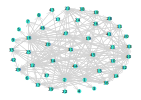

In [4]:
#Ligth Graphs and GraphsPlots are just for plotting the graphs 
using LightGraphs
using GraphPlot
#initializing an adjacency Matrix
adj = zeros(N,N);
for i=1:N
    for j=1:N 
        #for the sake of presentation only add arcs which have values smaller than 2800
        if c[i,j] > 0 && c[i,j] > 2800
            adj[i,j] = 1
        end
    end
end
#Define a directed Graph using the adjacency list
NatPark = DiGraph(adj);

#Numbering the nodes
node_label = [1:nv(NatPark)]
gplot(NatPark,layout=stressmajorize_layout, nodelabel=node_label[1])

In [5]:
#Given a starting_city and destination_city what is the shortest path?
function All_Shortest_paths(distances,starting_city,destination_city)
    c = distances;
    s=starting_city;
      d=destination_city;
    #########################################
    SP = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0));
    @variable(SP, x[i=1:N,j=1:N; 0<c[i,j]<1000]>=0);
    @objective(SP, Min, sum(sum(c[i,j]*x[i,j] for i=1:N if 0<c[i,j]<1000) for j=1:N));
        for i=1:N
        if i != s && i != d 
            @constraint(SP, sum(x[i,j] for j=1:N if 0<c[i,j]<1000)-sum(x[j,i] for j=1:N if 0<c[j,i]<1000) == 0);
        elseif i == s
            @constraint(SP, sum(x[i,j] for j=1:N if 0<c[i,j]<1000)-sum(x[j,i] for j=1:N if 0<c[j,i]<1000) == 1);
        elseif i == d
            @constraint(SP, sum(x[i,j] for j=1:N if 0<c[i,j]<1000)-sum(x[j,i] for j=1:N if 0<c[j,i]<1000) == -1);
        end
    end
    optimize!(SP);
    status = termination_status(SP);
    obj_value = objective_value(SP);
    x_value = value.(x);
    status, obj_value, x_value
end

All_Shortest_paths (generic function with 1 method)

In [6]:
solutions = [];
distances = c;
#Use the function to find the shortest path between every pair of parks
for s=1:N
    for d=1:N
        if s!=d
            starting_city = s
            destination_city = d
            status, obj_value, x_value = All_Shortest_paths(distances,starting_city,destination_city);
            push!(solutions,[(s,d),status,obj_value,x_value])
        end
    end
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [30]:
#Rearranging the data for the output
p = [];
distances = zeros(N,N)
paths = Array{Any,2}(undef,N,N);
for k=1:length(solutions)
temp = zeros(N,N);
    for i=1:N
        for j =1:N
            if 0<c[i,j]<1000
                temp[i,j] = solutions[k][4][i,j]
            end
        end
    end
    solutions[k][4] = temp
end

for s=1:N
    for d=1:N
        if s != d
            indx = findfirst(x -> (s,d)==x[1], solutions)
            city = s;
            cost = 0;
            Route = [];
            check = findfirst(x -> x >= 1-1e-6 && 0<x<1000, c[s,:])
            while true 
                push!(Route,city);
                next = findfirst(x -> x >= 1-1e-6, solutions[indx][4][city,:])
                if next == nothing 
                    break
                end
                local_cost = c[city,next];
                cost += local_cost
                city = next;
                
                if city == d
                    push!(Route,city);
                    break
                end
            end
            push!(Route,d);
            distances[s,d] = cost;
            paths[s,d] = Route;
        end
    end
end
distances = distances.*0.621371;
push!(p,distances);
push!(p,paths);

In [31]:
RawData = CSV.read("data.csv", header=true); 
names = RawData[!,1];
names = convert(Array{String}, names);

In [32]:
# Pretty Print function
function printDistanceandPath(start,dest)
    s=findfirst(x -> x == start ,names)
    d=findfirst(x -> x == dest ,names)
    println("s =", s)
    println("d = ", d)
    if s==nothing
        println("Invalid starting point")
        return
    end
    
    if d==nothing
        println("Invalid destination")
        return
    end
    
    indx = findfirst(x -> (s,d)==x[1], solutions)
    
   println("The shortest path from ",names[s]," to ",names[d]," is:")
   for i in p[2][s,d]
        println(names[i])
    end
    println("The path is ",p[1][s,d]," miles long.")
end

printDistanceandPath (generic function with 1 method)